In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
name_mapper = {'SVR': 'SVM', 'RandomForestRegressor': 'RF', 'AdaBoostRegressor': 'AdaBoost', 'GradientBoostingRegressor': 'GradientBoosting', 'BaggingRegressor': 'Bagging'}

In [3]:
styles = {'SVM': ['red', 'o', (0, (1, 1))], 'BayesianRidge': ['green', 'v', (0, (1, 1))], 
          'Lasso': ['blue', 'p', (0, (1, 1))], 'Ridge': ['cyan', 's', (0, (5, 10))], 
          'Bagging': ['orange', 'D', (0, (5, 5))], 'AdaBoost': ['violet', 'x', (0, (5, 1))], 
          'RF': ['magenta', 'd', (0, (3, 10, 1, 10))], 'GradientBoosting': ['olive', '8', (0, (3, 5, 1, 5))], 
          'Euclidean Distance (user-based)': ['yellow', 'H', (0, (3, 1, 1, 1))], 
          'Euclidean Distance (item-based)': ['black', '<', (0, (3, 5, 1, 5, 1, 5))], 
          'Pearson Correlation (user-based)': ['gray', '>', (0, (3, 10, 1, 10, 1, 10))], 
          'Pearson Correlation (item-based)': ['teal', '^', (0, (3, 1, 1, 1, 1, 1))], 
          'Jaccard Index (user-based)': ['lawngreen', 'P', 'solid'], 
          'Jaccard Index (item-based)': ['deeppink', '*', 'dashdot']}

### Baseline:

In [4]:
with open('../results/baseline_regression_results.json') as fr:
    baseline_reg = json.load(fr)    

In [5]:
with open('../results/baseline_collaborative_filtering_results (user-based).json') as fr:
    baseline_cb_user = json.load(fr)    

In [6]:
with open('../results/baseline_collaborative_filtering_results (item-based).json') as fr:
    baseline_cb_item = json.load(fr)    

In [7]:
def plot_baseline(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
    
    for model in baseline_reg:
        error = {'rmse': [], 'mae': []}
        for n_training_sem in sorted(baseline_reg[model]):
            error['rmse'].append(baseline_reg[model][n_training_sem]['rmse'][1])
            error['mae'].append(baseline_reg[model][n_training_sem]['mae'][1])
        
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(7), error['rmse'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
        axs[1].plot(np.arange(7), error['mae'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
    
    for model in cb_user:
        model_label = model + ' (user-based)'
        axs[0].plot(np.arange(7), cb_user[model]['rmse'], label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_user[model]['mae'], label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
    
    for model in cb_item:
        model_label = model + ' (item-based)'
        axs[0].plot(np.arange(7), cb_item[model]['rmse'], label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_item[model]['mae'], label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=12)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=12)
    axs[1].set_xlabel('Number of Training Semesters', fontfamily='serif', fontsize=12)
  
    axs[0].set_yticklabels([round(i,1) for i in axs[0].get_yticks()], fontfamily='serif', fontsize=12)
    axs[1].set_yticklabels([round(i,1) for i in axs[1].get_yticks()], fontfamily='serif', fontsize=12)
    
    axs[1].set_xticks(np.arange(7))
    axs[1].set_xticklabels(['N={}'.format(i+1) for i in range(7)], fontsize=12, fontfamily='serif')
    
    plt.subplots_adjust(hspace=.0)
    axs[1].legend(prop={'size': 7.4, 'family': 'serif'}, loc='center', bbox_to_anchor=(0.5, -0.51), ncol=3)
    plt.savefig('error_baseline.eps', bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


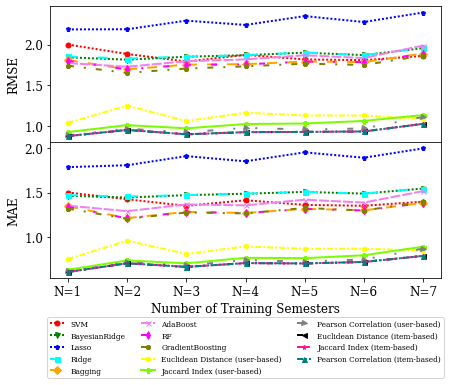

In [8]:
plot_baseline(baseline_reg, baseline_cb_user, baseline_cb_item)

### Student-based Clustering:

In [9]:
with open('../results/clustering_student_based_regression_results (with KMeans).json') as fr:
    student_cluster_reg = json.load(fr)   

In [10]:
with open('../results/clustering_user_based_collaborative_filtering_results (Student based with KMeans).json') as fr:
    student_cluster_cb_user = json.load(fr)  

In [11]:
with open('../results/clustering_item_based_collaborative_filtering_results (Student based with KMeans).json') as fr:
    student_cluster_cb_item = json.load(fr)    

In [12]:
def plot_student_based_clustering(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
    
    for model in reg:
        best_score = {}
        for num_cluster in reg[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            
            for n_training_sem in reg[model][num_cluster]:
                y_true = reg[model][num_cluster][n_training_sem]['y_true']
                y_pred = reg[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}        
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
                
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
    
    for model in cb_user:
        best_score = {}
        for num_cluster in cb_user[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_user[model][num_cluster]:
                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (user-based)'

        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])

    for model in cb_item:
        best_score = {}
        for num_cluster in cb_item[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_item[model][num_cluster]:
                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)

                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (item-based)'

        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=12)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=12)
    axs[1].set_xlabel('Number of Clusters (k)', fontfamily='serif', fontsize=12)
  
    axs[0].set_yticklabels([round(i,2) for i in axs[0].get_yticks()], fontfamily='serif', fontsize=12)
    axs[1].set_yticklabels([round(i,2) for i in axs[1].get_yticks()], fontfamily='serif', fontsize=12)
    
    axs[1].set_xticks(np.arange(5))
    axs[1].set_xticklabels(['k={}'.format(i) for i in range(10,31,5)], fontsize=12, fontfamily='serif')        
        
    plt.subplots_adjust(hspace=.0)
    axs[1].legend(prop={'size': 7.2, 'family': 'serif'}, loc='center', bbox_to_anchor=(0.5, -0.51), ncol=3)
    plt.savefig('error_cluster_student.eps', bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


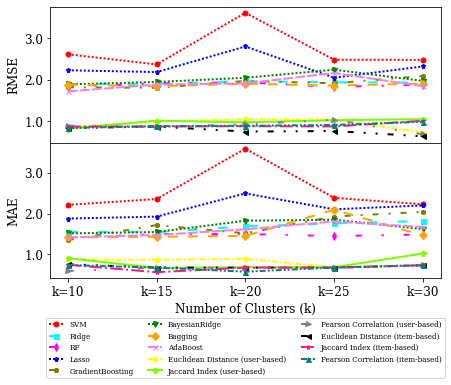

In [13]:
plot_student_based_clustering(student_cluster_reg, student_cluster_cb_user, student_cluster_cb_item)

### Course-based Clustering:

In [14]:
with open('../results/clustering_course_based_regression_results (with KMeans).json') as fr:
    course_cluster_reg = json.load(fr)    

In [15]:
with open('../results/clustering_user_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_user = json.load(fr)    

In [16]:
with open('../results/clustering_item_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_item = json.load(fr)    

In [17]:
def plot_course_based_clustering(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
    
    for model in reg:
        best_score = {}
        for num_cluster in reg[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in reg[model][num_cluster]:
                y_true = reg[model][num_cluster][n_training_sem]['y_true']
                y_pred = reg[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
         
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=2, ms=5, color=styles[model][0])
            
    for model in cb_user:
        best_score = {}
        for num_cluster in cb_user[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_user[model][num_cluster]:
                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (user-based)'
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        
    for model in cb_item:
        best_score = {}
        for num_cluster in cb_item[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_item[model][num_cluster]:
                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)

                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (item-based)'
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_label, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=2, ms=5, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=12)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=12)

    axs[1].set_xlabel('Number of Clusters (k)', fontfamily='serif', fontsize=12)
  
    axs[0].set_yticklabels([round(i,2) for i in axs[0].get_yticks()], fontfamily='serif', fontsize=12)
    axs[1].set_yticklabels([round(i,2) for i in axs[1].get_yticks()], fontfamily='serif', fontsize=12)
    
    axs[1].set_xticks(np.arange(5))
    axs[1].set_xticklabels(['k={}'.format(i) for i in range(10,31,5)], fontsize=12, fontfamily='serif')        
        
    plt.subplots_adjust(hspace=.0)
    axs[1].legend(prop={'size': 7.4, 'family': 'serif'}, loc='center', bbox_to_anchor=(0.5, -0.51), ncol=3)
    plt.savefig('error_cluster_course.eps', bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


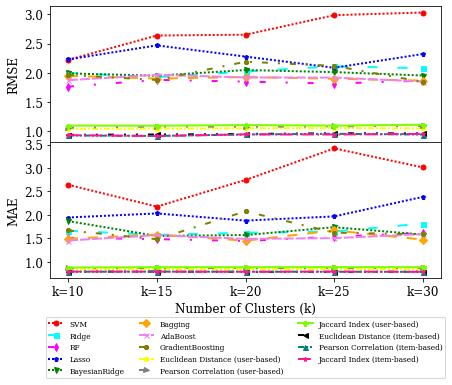

In [18]:
plot_course_based_clustering(course_cluster_reg, course_cluster_cb_user, course_cluster_cb_item)

### Comparison with the state of the art

In [19]:
with open('../results/nn_results.json') as fr:
    nn = json.load(fr)    

In [20]:
with open('../results/naive_bayes_results.json') as fr:
    nb = json.load(fr)    

In [21]:
with open('../results/2017 paper.json') as fr:
    cb_2017 = json.load(fr)    

In [22]:
def plot_state_of_the_art(nn, nb, cb_2017):
    min_rmse = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    
    paper_2017 = np.min(cb_2017['Euclidean Distance']['rmse'])
    min_rmse['CB - Cakmak (2017)'] = paper_2017
    min_rmse['CB - Ibrahimzada et al. (2020)'] = 0.633074917194508
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        min_rmse.setdefault(model_name, 100)
        for n_training_semesters in nb[model]:
            if nb[model][n_training_semesters]['rmse'][1] < min_rmse[model_name]:
                min_rmse[model_name] = nb[model][n_training_semesters]['rmse'][1]
    
    x = np.arange(5)
    min_rmse = {k: v for k, v in sorted(min_rmse.items(), key=lambda item: item[1])}
    model_names = list(min_rmse.keys())
    fig, ax = plt.subplots(figsize=(7.8, 4))
    
    for i in range(len(model_names)):
        ax.bar(i, min_rmse[model_names[i]], 0.8, label=model_names[i])
    
    for i, v in enumerate(min_rmse.values()):
        ax.text(i-0.17, v + 0.08, str(round(v, 2)), fontfamily='serif', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('RMSE', fontfamily='serif', fontsize=12)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=12)
    ax.legend(prop={'size': 12, 'family': 'serif'})
    plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
    plt.savefig('state of the art.eps', bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


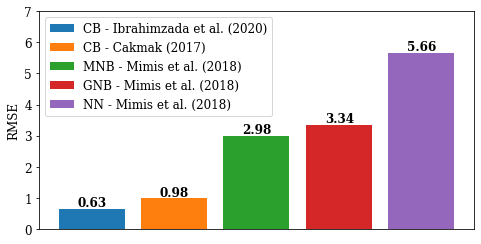

In [23]:
plot_state_of_the_art(nn, nb, cb_2017)